# [__Introduction to Python__](https://eventum.upf.edu/64915/section/30365/recsm-summer-methods-school-2021.html)

### [Tom Paskhalis](https://tom.paskhal.is/)

### [RECSM Summer School 2021](https://eventum.upf.edu/64915/detail/recsm-summer-methods-school-2021.html), Linear Regression & Communicating Results, Part 5, Day 2

## Anscombe's quartet

- 4 artificial datasets constructed by [Anscombe (1973)](https://doi.org/10.1080/00031305.1973.10478966)
- All of them have nearly identical summary statistics
- But show dramatically different relationships between variables
- Designed to illustrate the importance of data visualization

## Data for Anscombe's quartet

In [1]:
import pandas as pd
anscombe_quartet = pd.read_csv('../data/anscombes_quartet.csv')

In [2]:
anscombe_quartet.head()

,dataset,x,y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81
4,I,11,8.33


## Summary statistics for Anscombe's quartet

In [3]:
# Here we use `groupby` method to create summary by a variable ('dataset')
anscombe_quartet.groupby(['dataset']).describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

## Plotting Anscombe's quartet

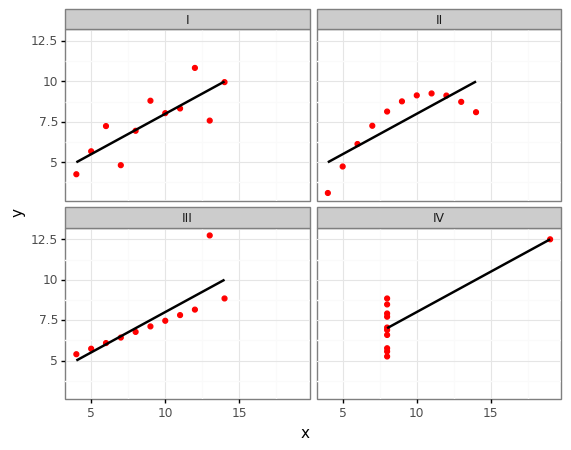

<ggplot: (8776537551011)>

In [4]:
from plotnine import *

ggplot(anscombe_quartet, aes(x = 'x', y = 'y')) +\
    geom_point(colour = 'red') +\
    geom_smooth(method = 'lm', se = False) +\
    facet_wrap('dataset') +\
    theme_bw()                                     

## Linear regression

- Linear regression is the classical tool of statistical analysis
- It allows to estimate the degree of association between variables
- Typically, it is the association between one or more independent variables (IV) and one dependent variable (DV)
- The main quantities of interest usually are direction, magnitude of association and its statistical significance

## Linear regression in Python

- As for tabular data and visualization we need external libraries for running regression
- `statsmodels` library provides tools for estimating many statistical models
- Another useful library is `scikit-learn`
- It is more focussed on machine-learning applications

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf # Formula API provides R-style formula specification

## Data transformation

In [6]:
kaggle2020 = pd.read_csv('../data/kaggle_survey_2020_responses.csv', skiprows = [1])

In [7]:
# Let's give more intuitive names to out variables
kaggle2020 = kaggle2020.rename(columns = {
                'Q1': 'age',
                'Q2': 'gender',
                'Q3': 'country',
                'Q4': 'education',
                'Q24': 'compensation'})

In [8]:
kaggle2020['compensation'].head()

0                NaN
1    100,000-124,999
2      15,000-19,999
3    125,000-149,999
4                NaN
Name: compensation, dtype: object

In [9]:
from statistics import mean
# Here we are replacing the compensation range by its midpoint (i.e. 112499.5 for $100,000-$124,999)
# This variable requires substantial cleaning before transformation
# Such as extraneous symbols ('$', ',', '>') have to ver removed
kaggle2020['compensation'] = kaggle2020['compensation'].map(
    lambda x: mean([float(x.replace(',','').replace('$','').replace('>','')) for x in str(x).split('-')])
)

## Pandas and linear regression

In [10]:
kaggle2020['compensation'] # Level of compensation (in USD) - our DV

0             NaN
1        112499.5
2         17499.5
3        137499.5
4             NaN
           ...   
20031         NaN
20032         NaN
20033       499.5
20034       499.5
20035       499.5
Name: compensation, Length: 20036, dtype: float64

In [11]:
# Formula specification allows to write 'DV ~ IV_1 + IV_2 + ... + IV_N' as model specification
results = smf.ols('compensation ~ age + gender + education', data = kaggle2020).fit()

## Model summary

In [12]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           compensation   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     70.41
Date:                Tue, 29 Jun 2021   Prob (F-statistic):          1.98e-268
Time:                        02:49:14   Log-Likelihood:            -1.3352e+05
No. Observations:               10729   AIC:                         2.671e+05
Df Residuals:                   10708   BIC:                         2.672e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================================
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                       1.536e+04   2847.115      5.396      0.000    9781.101    2.09e+04
age[T.22-24]                                                                   -1016.3138   3232.489     -0.314      0.753   -7352.593    5319.965
age[T.25-29]                                                                    9158.0382   3101.900      2.952      0.003    3077.739    1.52e+04
age[T.30-34]                                                                    2.694e+04   3173.713      8.489      0.000    2.07e+04    3.32e+04
age[T.35-39]                                                                    3.526e+04   3285.667     10.731      0.000    2.88e+04    4.17e+04
age[T.40-44]                                                                    4.699e+04   3449.386     13.624      0.000    4.02e+04    5.38e+04
age[T.45-49]                                                                    4.988e+04   3622.541     13.769      0.000    4.28e+04     5.7e+04
age[T.50-54]                                                                    5.813e+04   3920.439     14.829      0.000    5.04e+04    6.58e+04
age[T.55-59]                                                                    6.231e+04   4567.852     13.642      0.000    5.34e+04    7.13e+04
age[T.60-69]                                                                     5.02e+04   4539.192     11.060      0.000    4.13e+04    5.91e+04
age[T.70+]                                                                      4.281e+04   9023.409      4.744      0.000    2.51e+04    6.05e+04
gender[T.Nonbinary]                                                             5.813e+04   1.38e+04      4.220      0.000    3.11e+04    8.51e+04
gender[T.Prefer not to say]                                                     1.365e+04   5429.547      2.515      0.012    3010.097    2.43e+04
gender[T.Prefer to self-describe]                                               1.189e+04   1.29e+04      0.924      0.355   -1.33e+04    3.71e+04
gender[T.Woman]                                                                -9039.3914   1647.938     -5.485      0.000   -1.23e+04   -5809.127
education[T.Doctoral degree]                                                    1.213e+04   1971.507      6.153      0.000    8265.229     1.6e+04
education[T.I prefer not to answer]                                            -1.507e+04   5047.604     -2.986      0.003    -2.5e+04   -5178.948
education[T.Master’s degree]                                                    6841.4159   1471.853      4.648      0.000    3956.312    9726.

## Markdown - a language of reports

- Markdown is a markup language for formatting text with simple syntax
- The key goal of Markdown is readability
- Only a limited set of formatting options is supported
- Markdown is used in online documentation, blogging and instant messaging

## Formatting text in Markdown

- For *italics* ```*one star on each side*```
- For **bold** ```**two stars on each side**```
- For ~~strikethrough~~ ```~~two tildes on each side~~```

## Lists in Markdown

For bulleted or unordered list of items:

```
- Just add a dash first and then write a text.
- If you add another dash in the following line, you will have another item in the list.
  - If you add four spaces or use a tab key, you will create an indented list.
```

For numbered or ordered list of items:

```
1. Just type a number and then write a text.
2. If you want to add a second item, just type in another number.
1. If you make a mistake when typing numbers, fear not, Markdown will correct it for you.
    1. If you press a tab key or type four spaces, you will get an indented list and the numbering
    will start from scratch.
```

## Headers in Markdown

Headers or section titles are created with hashes(```#```)

```# This is a first-tier header```

```## This is a second-tier header```

```### This is a third-tier header```

## Images and links in Markdown

- To add an image you can write ```![some text](image_path)```
- To add a link you can write ```[some text](URL)```
- For more complex cases HTML code can be used

## Tables in Markdown

- Tables in Markdown can be created using the following syntax (there are a few variants)

```
| Header1 | Header2 |
|:--------|:--------|
| content | content |
```

- ```:---``` produces left-aligned text in cells
- ```---:``` produces right-aligned text in cells
- ```:--:``` produces centered text in cells

## Markdown tables in pandas

- Pandas can generate Markdown tables from DataFrame

In [13]:
# Let's revisit the summary statistics of Anscombe's quartet
anscombe_quartet.groupby(['dataset']).describe().iloc[:,0:3]

x               
        count mean       std
dataset                     
I        11.0  9.0  3.316625
II       11.0  9.0  3.316625
III      11.0  9.0  3.316625
IV       11.0  9.0  3.316625

In [14]:
print(anscombe_quartet.groupby(['dataset']).describe().iloc[:,0:3].to_markdown(index = False))

|   ('x', 'count') |   ('x', 'mean') |   ('x', 'std') |
|-----------------:|----------------:|---------------:|
|               11 |               9 |        3.31662 |
|               11 |               9 |        3.31662 |
|               11 |               9 |        3.31662 |
|               11 |               9 |        3.31662 |


## The end

<div style="text-align: center;">
    <img width="500" height="300" src="imgs/butterfly_meme.jpg">
</div>